# Investigating Relationship Between GDP and Life-Expectancy
Analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship 

between the GDP and life expectancy of six countries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from statsmodels.api import OLS # type: ignore

## Load Dataset

In [2]:
data = pd.read_csv('all_data.csv')

### First 5 Rows

In [3]:
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


### Distribution of Numeric Columns

In [4]:
data.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


### Column Descriptions

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


## Analysis

### Number of Unique Countries

In [7]:
countries = data['Country'].unique()
print(countries)

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


### Average GDP of The Six Countries

In [9]:
data.groupby('Country')['GDP'].mean()

Country
Chile                       1.697888e+11
China                       4.957714e+12
Germany                     3.094776e+12
Mexico                      9.766506e+11
United States of America    1.407500e+13
Zimbabwe                    9.062580e+09
Name: GDP, dtype: float64

### Average Life Expectancy of the Six Countries

In [10]:
data.groupby('Country')['Life expectancy at birth (years)'].mean()

Country
Chile                       78.94375
China                       74.26250
Germany                     79.65625
Mexico                      75.71875
United States of America    78.06250
Zimbabwe                    50.09375
Name: Life expectancy at birth (years), dtype: float64

### Visualization of GDP as a function of Year

0 0
1 1
2 0
3 1
4 0
5 1


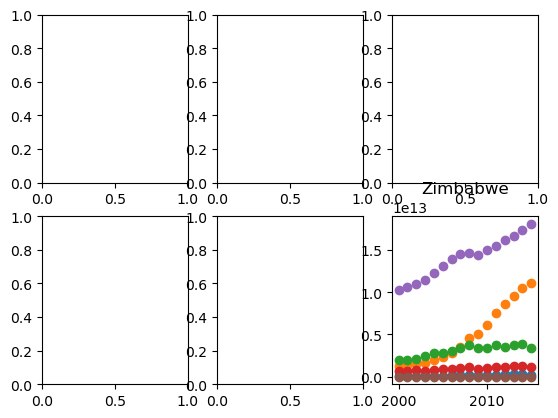

In [37]:
gdp_yrs_fig, axes = plt.subplots(2, 3)
# data_by_country = data.groupby('Country')

for idx, country in enumerate(countries):
    xvals = data[data['Country'] == country]['Year']
    yvals = data[data['Country'] == country]['GDP']

    print(idx, idx % 2)

    axes[idx % 2, idx % 2] = plt.scatter(x=xvals, y=yvals)
    plt.title(country)